Inpendent Variables:
    GDP per capita
    Human Development Index (HDI)
    Total Population
    Transparency Index

Dependent Variables:
    Total Cases per million
    Total Deaths per million
    People fully vaccinated per hundred
    
Other Data Columns:
    ISO Code
    Continent
    Location
    Date

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

import seaborn as sns; sns.set(style='white')


In [2]:
# Study data files
owidCovidData = "Resources/owid-covid-data.csv"
transparencyData = "Resources/Transparency Index.csv"

CovidData = pd.read_csv(owidCovidData)
Transparency = pd.read_csv(transparencyData)
Transparency

Country  Score   Rank
0    Afghanistan   19.0  165.0
1        Albania   36.0  104.0
2        Algeria   36.0  104.0
3         Angola   27.0  142.0
4      Argentina   42.0   78.0
..           ...    ...    ...
174      Vietnam   36.0  104.0
175        Yemen   15.0  176.0
176       Zambia   33.0  117.0
177     Zimbabwe   24.0  157.0
178          NaN    NaN    NaN

[179 rows x 3 columns]

In [3]:
# eliminate extra columns
CovidClean = CovidData.copy()
CovidClean.drop([ 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million', 
                 'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 
                 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
                 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 
                 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 
                 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 
                 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index',
                 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy'],
                 axis = 1, inplace = True)


# limit to max date
CovidClean = CovidClean[CovidClean['date'].isin(['2021-04-27'])]

# rename "Location" to "Country"
CovidClean.rename(columns={"location":"Country"}, inplace=True)

# rename everything else for ease
CovidClean.rename(columns={"total_cases_per_million":"Cases", "total_deaths_per_million": "Deaths", "people_fully_vaccinated_per_hundred":"Vaxxed", 
                           "population": "Population", "population_density": "Density","gdp_per_capita": "GDP", "human_development_index": "HDI"}, inplace=True)

# merge with Transparency (inner join)
CovidAll= pd.merge(CovidClean, Transparency, on=["Country"], how="inner")

CovidClean
CovidAll
CovidAll.to_csv("Resources/CovidWorkingData.csv", index = False)

In [5]:
# See if there is substantial difference looking at only the first half of the pandemic

CovidAug20 = CovidData.copy()
CovidAug20.drop([ 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million', 
                 'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 
                 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
                 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 
                 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 
                 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 
                 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index',
                 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy'],
                 axis = 1, inplace = True)


# limit to max date
CovidAug20 = CovidAug20[CovidAug20['date'].isin(['2020-08-31'])]

# rename "Location" to "Country"
CovidAug20.rename(columns={"location":"Country"}, inplace=True)

# rename everything else for ease
CovidAug20.rename(columns={"total_cases_per_million":"Cases", "total_deaths_per_million": "Deaths", "people_fully_vaccinated_per_hundred":"Vaxxed", 
                           "population": "Population", "population_density": "Density","gdp_per_capita": "GDP", "human_development_index": "HDI"}, inplace=True)

# merge with Transparency (inner join)
CovidAll820= pd.merge(CovidAug20, Transparency, on=["Country"], how="inner")

# rename index to location

CovidAug20
CovidAll820
CovidAll820.to_csv("Resources/CovidWorkingData820.csv", index = False)

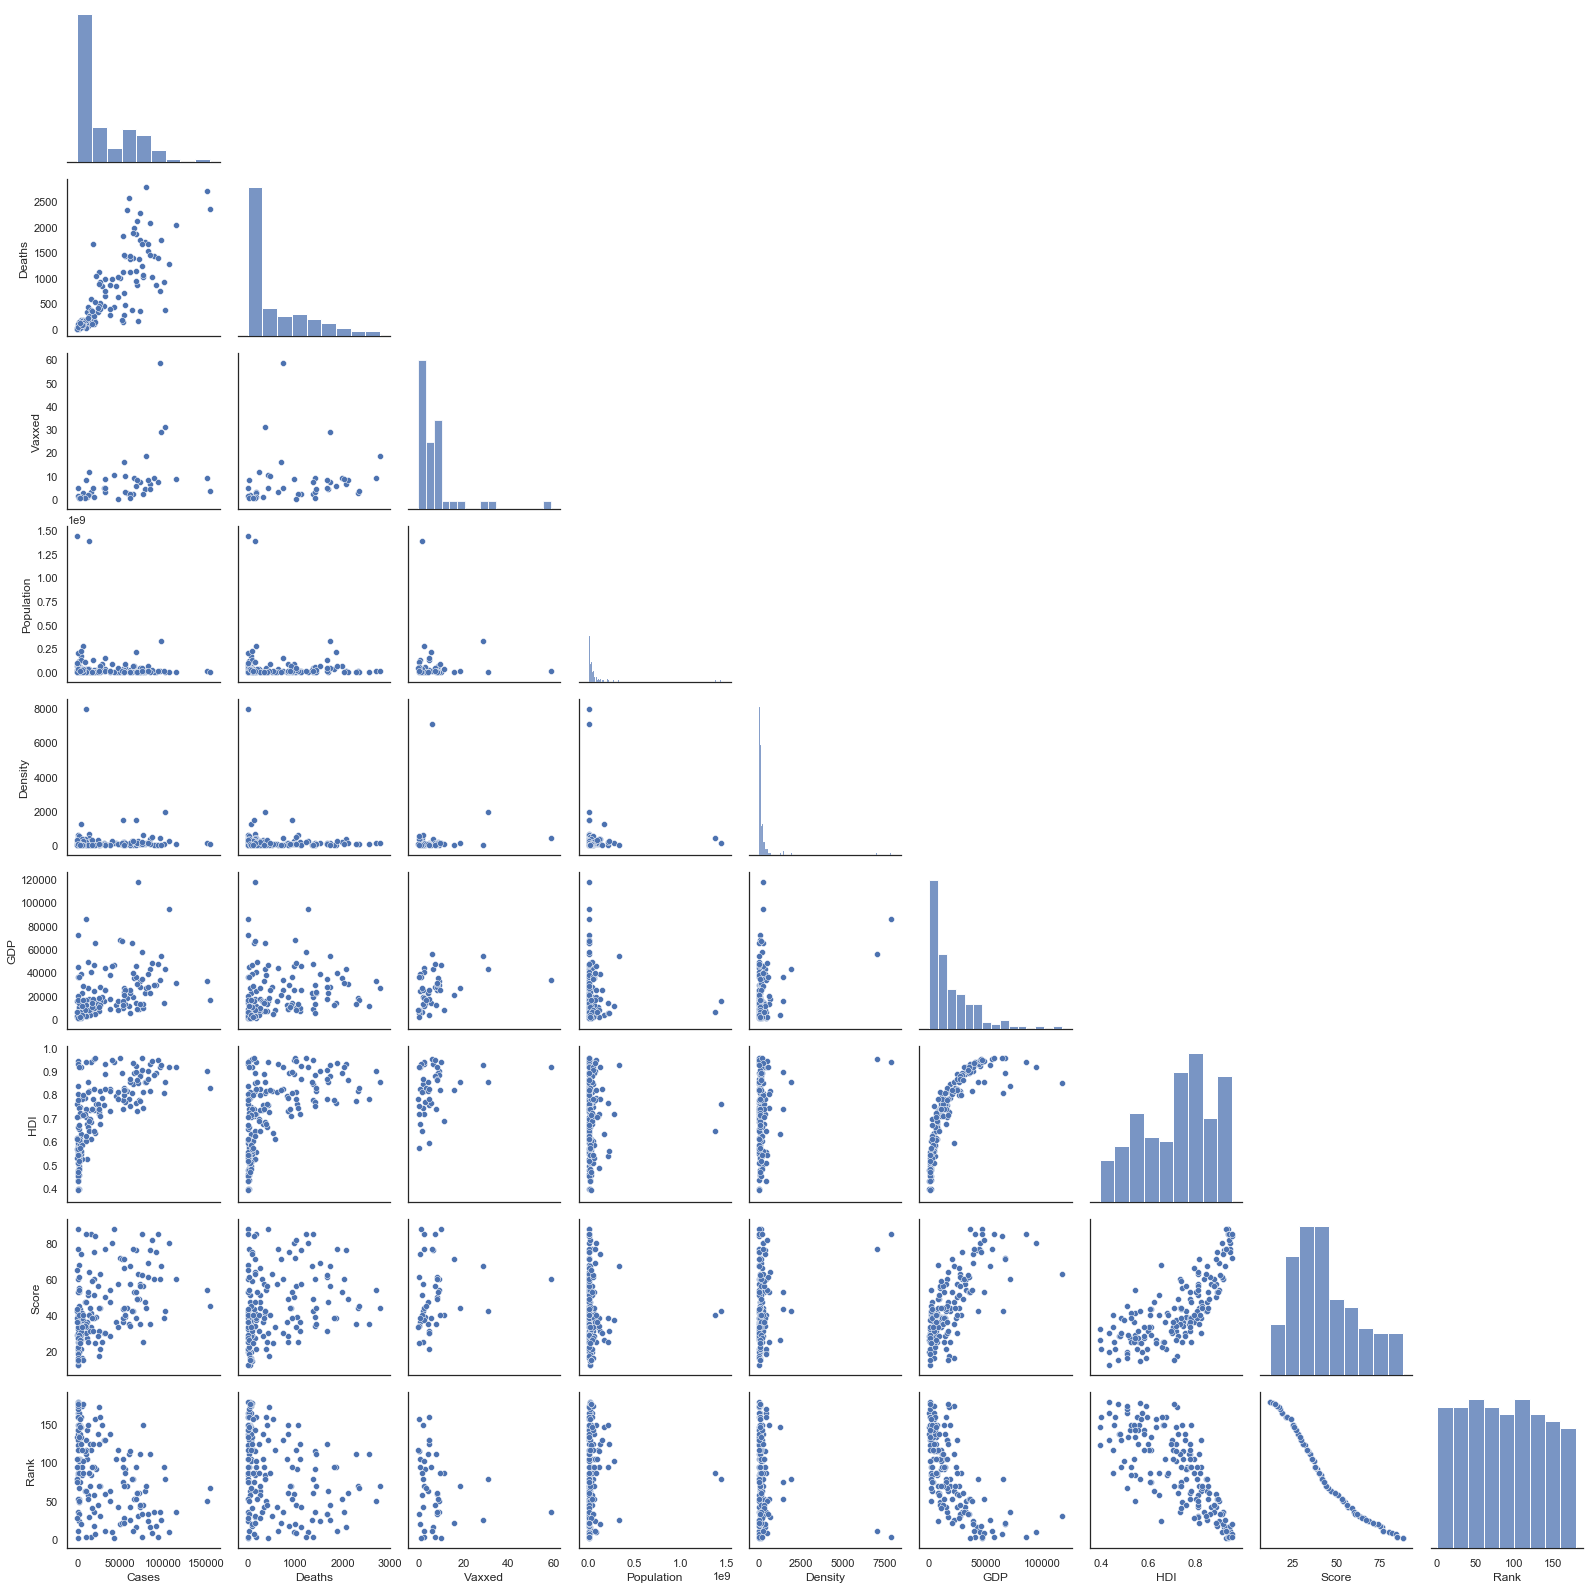

In [6]:
# Use Seaborn to create a PairGrid
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'coor = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(CovidAll, corner=True)  # Set corner=True to plot only the lower triangle:
g.map_lower(corrfunc)
plt.show()

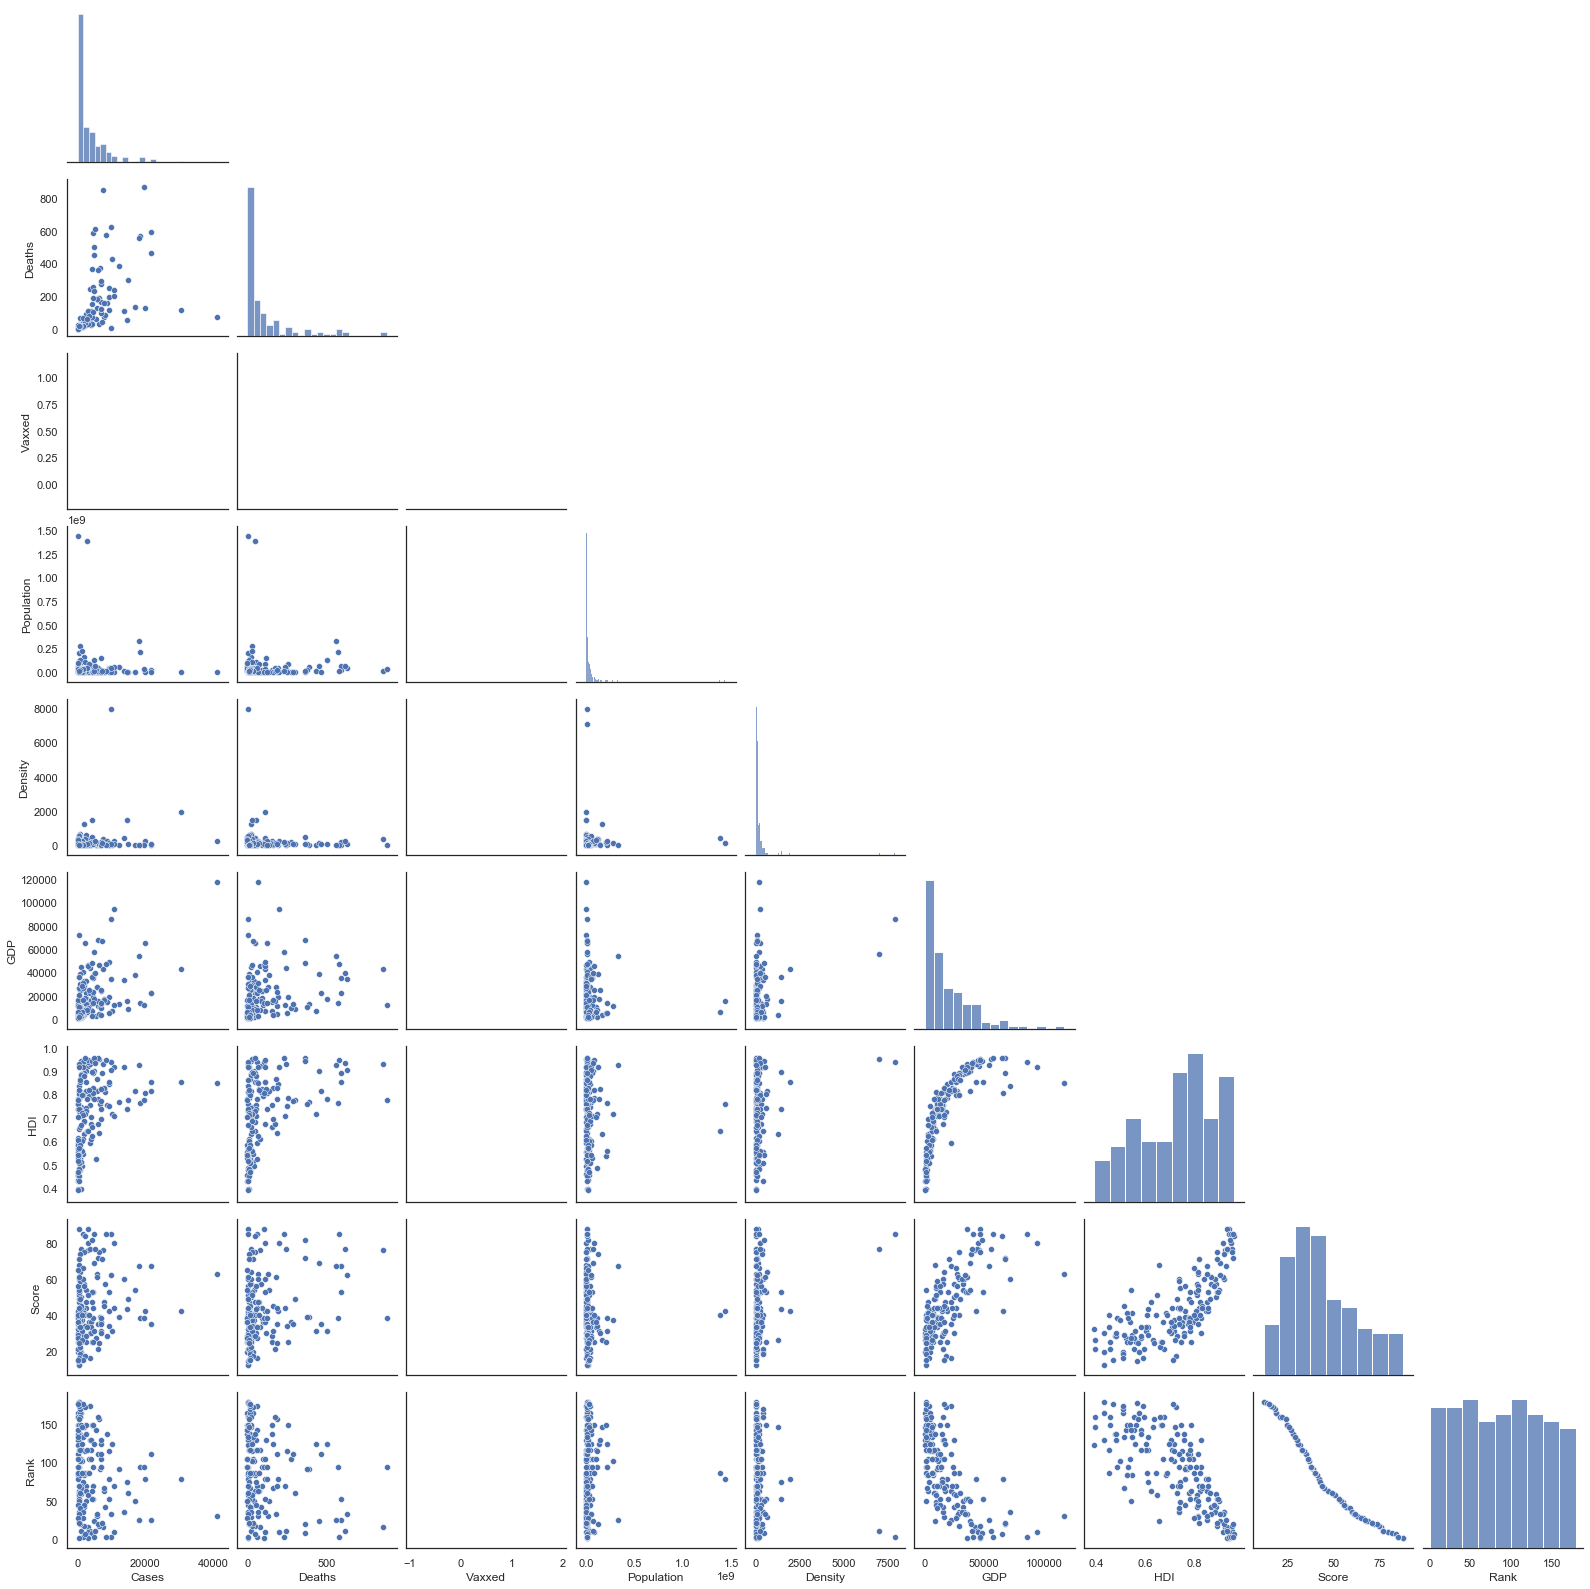

In [7]:
# Use Seaborn to create a PairGrid
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'coor = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(CovidAll820, corner=True)  # Set corner=True to plot only the lower triangle:
g.map_lower(corrfunc)
plt.show()